In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
json_path = '/opt/workspace/dataset/train.json'
with open(json_path, 'r') as j:
    json_data = json.load(j)

In [5]:
cate_list = []
crowd_list = []
area_list = []
height_list = []
width_list = []
annos = json_data['annotations']
for ann in annos:
    cate_list.append(ann['category_id'])
    crowd_list.append(ann['iscrowd'])
    area_list.append(ann['area'])
    height_list.append(ann['bbox'][3])
    width_list.append(ann['bbox'][2])

In [6]:
df = pd.DataFrame({
                    'category':cate_list, 
                    'is_crowd':crowd_list, 
                    'area':area_list,
                    'height':height_list,
                    'width':width_list
                    })
df.head()

,category,is_crowd,area,height,width
0,0,0,257301.66,469.7,547.8
1,3,0,10402.56,180.6,57.6
2,7,0,26259.36,181.6,144.6
3,4,0,69096.17,251.9,274.3
4,5,0,24164.58,103.4,233.7


/tmp/ipykernel_4084729/912360627.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'class_name', data = df, palette=["#55967e", "#263959"])
/tmp/ipykernel_4084729/912360627.py:6: UserWarning: 
The palette list has fewer values (2) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(x = 'class_name', data = df, palette=["#55967e", "#263959"])


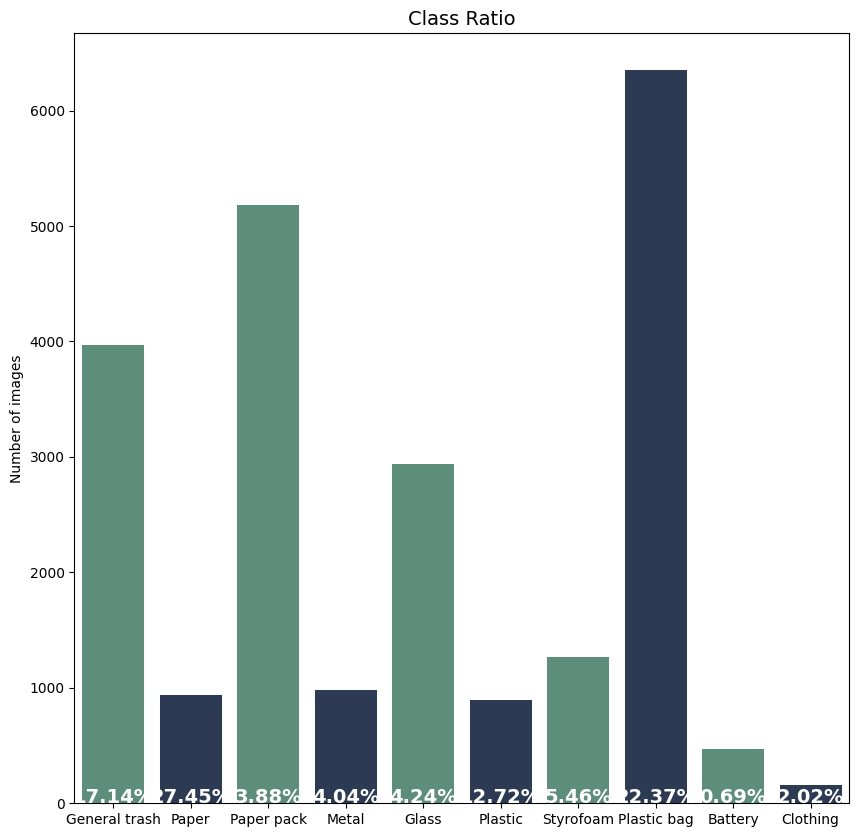

In [9]:
classes = ['General trash', 'Paper', 'Paper pack', 'Metal', 'Glass', 'Plastic', 'Styrofoam', 'Plastic bag', 'Battery', 'Clothing']
classes_dict = {i:classes[i] for i in range(10) }
df['class_name'] = df['category'].map(classes_dict)

plt.figure(figsize=(10, 10)) 
ax = sns.countplot(x = 'class_name', data = df, palette=["#55967e", "#263959"])

plt.xticks( np.arange(10), classes )
plt.title('Class Ratio',fontsize= 14)
plt.xlabel('')
plt.ylabel('Number of images')

counts = df['category'].value_counts().sort_index()
counts_pct = [f'{elem * 100:.2f}%' for elem in counts / counts.sum()]
for i, v in enumerate(counts_pct):
    ax.text(i, 0, v, horizontalalignment = 'center', size = 14, color = 'w', fontweight = 'bold')
plt.show()

In [20]:
pd.DataFrame({'count' : counts.values,
              'ratio': counts_pct},
             index = classes).sort_values(by='count', ascending=False)

,count,ratio
Paper,6352,27.45%
Plastic bag,5178,22.37%
General trash,3966,17.14%
Plastic,2943,12.72%
Styrofoam,1263,5.46%
Glass,982,4.24%
Metal,936,4.04%
Paper pack,897,3.88%
Clothing,468,2.02%
Battery,159,0.69%


/tmp/ipykernel_4084729/1538171243.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'is_crowd', data = df, palette=["#55967e", "#263959"])
/tmp/ipykernel_4084729/1538171243.py:2: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  ax = sns.countplot(x = 'is_crowd', data = df, palette=["#55967e", "#263959"])


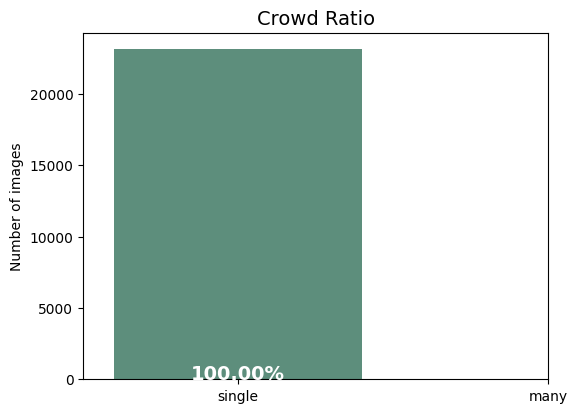

In [8]:
plt.figure(figsize=(6, 4.5)) 
ax = sns.countplot(x = 'is_crowd', data = df, palette=["#55967e", "#263959"])

plt.xticks( np.arange(2), ['single', 'many'] )
plt.title('Crowd Ratio',fontsize= 14)
plt.xlabel('')
plt.ylabel('Number of images')

counts = df['is_crowd'].value_counts().sort_index()
counts_pct = [f'{elem * 100:.2f}%' for elem in counts / counts.sum()]
for i, v in enumerate(counts_pct):
    ax.text(i, 0, v, horizontalalignment = 'center', size = 14, color = 'w', fontweight = 'bold')
plt.show()

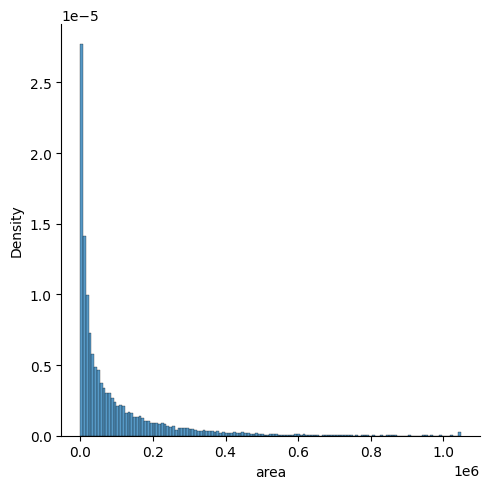

In [7]:
sns.displot(df, x="area", stat="density")
plt.show()

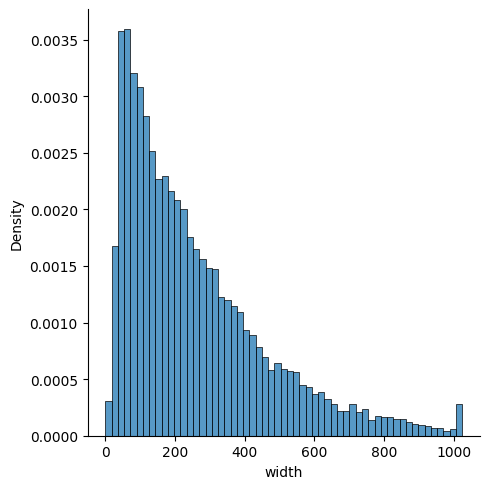

In [8]:
sns.displot(df, x="width", stat="density")
plt.show()

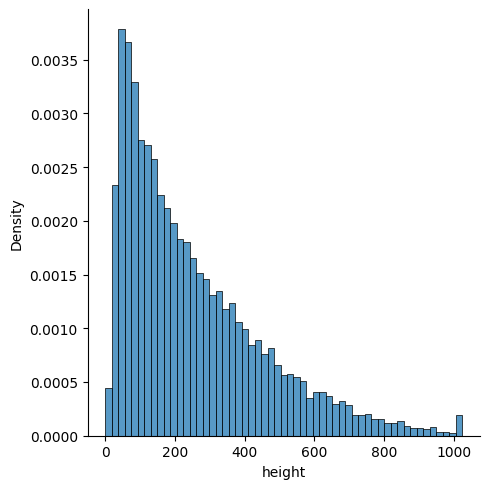

In [9]:
sns.displot(df, x="height", stat="density")
plt.show()